## Student Performance Indicator

### Project Overview
This project aims to analyze how various socio-economic factors impact student performance in exams. The focus is on understanding the relationship between student demographics and their test scores, and using this analysis to build predictive models that can forecast student outcomes based on these variables.


### Life Cycle of a Machine Learning Project

1. **Understanding the Problem Statement**
   - Formulate the problem as a predictive modeling task.
   - Identify the key variables that might influence student performance.

2. **Data Collection**
   - **Source:** Kaggle Dataset - [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
   - **Dataset Overview:** 
     - The dataset contains 8 columns and 1000 rows.
     - Columns include features like Gender, Ethnicity, Parental Education, etc.

3. **Data Checks**
   - Perform initial checks for missing data, data types, and unique values.
   - Identify potential data quality issues and plan for remediation.

4. **Exploratory Data Analysis (EDA)**
   - Visualize the distribution of key features.
   - Analyze correlations between features and student performance.
   - Investigate patterns and outliers in the data.

5. **Data Pre-Processing**
   - Handle missing values and outliers.
   - Encode categorical variables.
   - Normalize/Standardize numerical features where necessary.

6. **Model Training**
   - Split the data into training and testing sets.
   - Train multiple models (e.g., Linear Regression, Random Forest) and evaluate their performance.
   - Fine-tune the best-performing model using hyperparameter optimization.

7. **Model Selection**
   - Choose the model with the best balance between accuracy and interpretability.
   - Validate the model on a holdout dataset to ensure generalizability.

### 2.1 Import Data and Required Packages

#### Importing Necessary Libraries
In this section, we'll import essential libraries for data manipulation, visualization, and handling warnings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset
We’ll import the dataset into a Pandas DataFrame to explore and analyze the data.

In [2]:
df = pd.read_csv('data/student_performance.csv')

#### Display the First Few Records
We’ll inspect the top 5 records to understand the structure and contents of the dataset.

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- This provides a quick overview of the dataset, showcasing the first 5 entries.

#### Check the Shape of the Dataset
Understanding the shape of the dataset helps in identifying the number of rows and columns.

In [4]:
df.shape

(1000, 8)

- **Output:** The shape function returns the dimensions of the dataset in terms of rows and columns.

### 2.2 Dataset Information
Here’s a breakdown of each feature in the dataset:

- **Gender:** The gender of the student (Male/Female).
- **Race/Ethnicity:** The ethnic background of the student, categorized into groups (A, B, C, D, E).
- **Parental Level of Education:** The highest education level achieved by the parents, including options like Bachelor's Degree, Some College, Master's Degree, Associate's Degree, and High School.
- **Lunch:** The type of lunch the student had before the test (Standard or Free/Reduced).
- **Test Preparation Course:** Whether the student completed a test preparation course before the exam (Completed/Not Completed).
- **Math Score:** The score achieved by the student in Mathematics.
- **Reading Score:** The score achieved by the student in Reading.
- **Writing Score:** The score achieved by the student in Writing.

### 3. Data Validation and Pre-Processing

In this section, we will perform essential data checks to ensure data quality and prepare it for further analysis.

1. **Check for Missing Values**
2. **Check for Duplicate Entries**
3. **Verify Data Types**
4. **Examine Unique Values in Each Column**
5. **Statistical Overview of the Dataset**
6. **Explore Categorical Data**

### 3.1 Check for Missing Values

First, let's identify if there are any missing values in the dataset.

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


- **Insight:** The dataset is clean with no missing values, which simplifies the pre-processing steps.

### 3.2 Check for Duplicate Entries

Next, we check if there are any duplicate records that might skew the analysis.

In [6]:
df.duplicated().sum()

0


- **Insight:** There are no duplicate entries in the dataset, ensuring that each record is unique.

### 3.3 Verify Data Types

Understanding the data types of each column is crucial as it impacts how we handle and process the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- **Insight:** The data types align with our expectations. Categorical variables are represented as objects, and numerical scores are integers.

### 3.4 Examine Unique Values in Each Column

We’ll now look at the number of unique values in each column to understand the diversity within the dataset.

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

- **Insight:** This step helps in identifying categorical features and understanding the distribution of unique values across the dataset.

### 3.5 Statistical Overview of the Dataset

Let's generate summary statistics to gain insights into the central tendencies, dispersion, and shape of the dataset’s distribution.

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- The mean scores for Math, Reading, and Writing are closely aligned, ranging from 66 to 68.
- The standard deviations are also similar, indicating consistent variability across subjects.
- The minimum score in Math is 0, which is significantly lower than the minimum scores in Writing (10) and Reading (17).

### 3.6 Exploring Data Categories

We will explore the different categories present in the categorical columns to understand the distribution of data.

In [10]:
print("Categories in 'gender' variable:     ", df['gender'].unique())
print("Categories in 'race/ethnicity' variable:  ", df['race_ethnicity'].unique())
print("Categories in 'parental level of education' variable:", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ", df['lunch'].unique())
print("Categories in 'test preparation course' variable:     ", df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### 3.7 Defining Numerical and Categorical Features

It's important to distinguish between numerical and categorical features for more targeted data processing.

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Calculating Total Score and Average

To provide a more comprehensive analysis of student performance, we'll calculate the total score and average for each student.

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 3.9 Performance Analysis

Now, let's analyze the performance of students in each subject, identifying both top performers and those who may need additional support.

In [13]:
# Students with full marks in each subject
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
# Students with less than 20 marks in each subject
math_less_20 = df[df['math_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
- Students have generally performed best in Reading, with fewer students scoring below 20.
- Math seems to be the most challenging subject, with the highest number of low scores.
- These insights could be valuable for targeted academic interventions.

### 4. Exploring Data (Visualization)

Data visualization is crucial for uncovering patterns and trends that are not immediately apparent from the raw data. In this section, we will explore the distribution of average scores, total scores, and examine how various factors such as gender, lunch type, parental education, and race/ethnicity influence student performance.

#### 4.1 Visualize Average Score Distribution

To begin, we'll visualize the distribution of average scores using histograms and Kernel Density Estimation (KDE) plots. These visualizations will help us draw meaningful conclusions about the data.

##### 4.1.1 Histogram & KDE

We will first analyze the overall distribution of average scores and then delve deeper into gender-based comparisons.

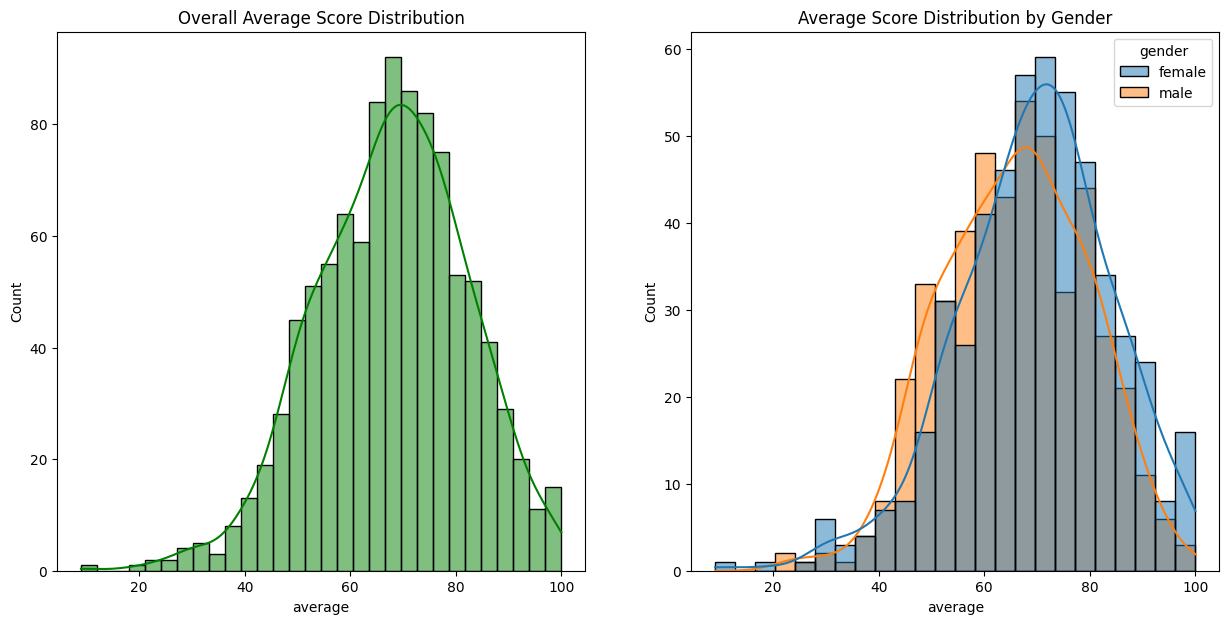

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram with KDE for overall average score distribution
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title('Overall Average Score Distribution')

# Histogram with KDE for average score distribution by gender
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title('Average Score Distribution by Gender')

plt.show()

##### Insights:
- The overall distribution of average scores is approximately normal.
- Female students tend to perform better than male students across the board, as indicated by the KDE plots.

Next, we'll examine the distribution of total scores in a similar manner.

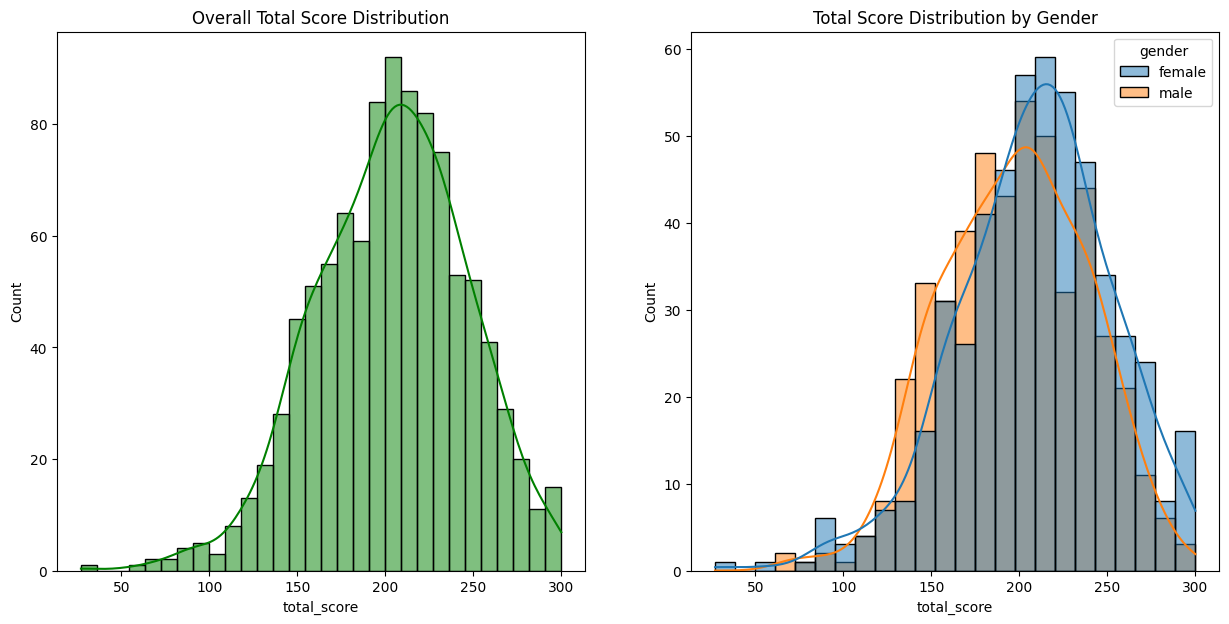

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram with KDE for overall total score distribution
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.title('Overall Total Score Distribution')

# Histogram with KDE for total score distribution by gender
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.title('Total Score Distribution by Gender')

plt.show()

##### Insights:
- The trends observed in the average scores are mirrored in the total scores, with female students outperforming male students.

Next, we’ll explore how lunch type affects performance.

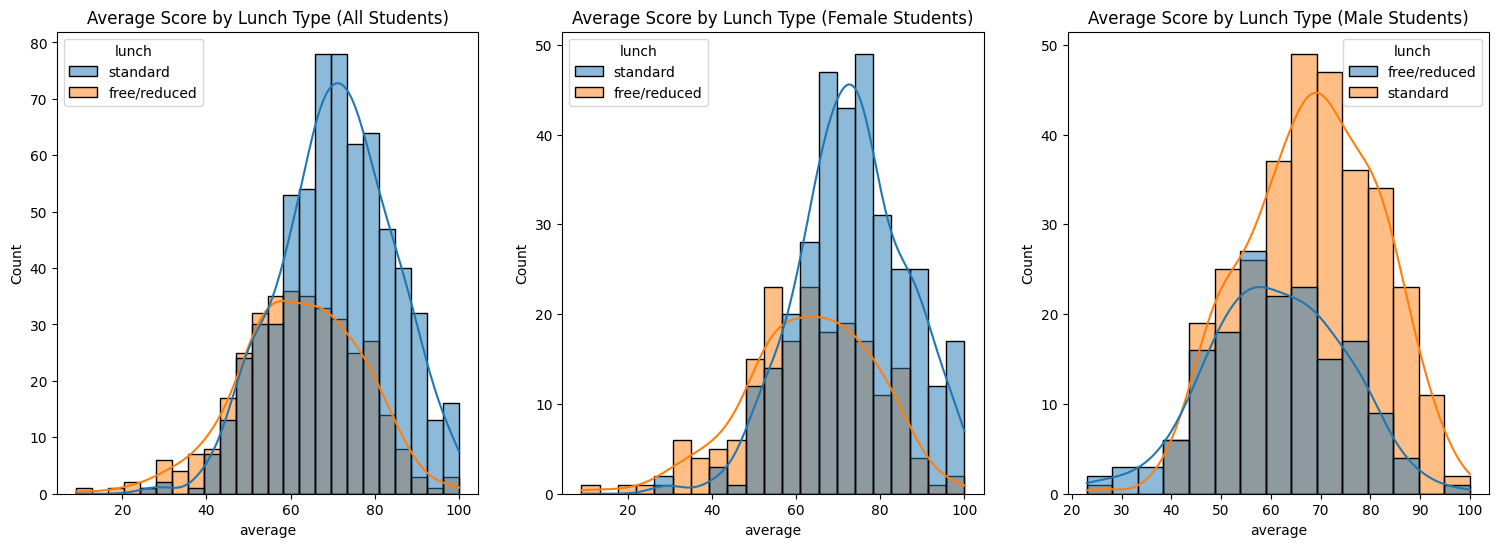

In [17]:
plt.subplots(1, 3, figsize=(25, 6))

# Average score distribution by lunch type for all students
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Average Score by Lunch Type (All Students)')

# Average score distribution by lunch type for female students
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Average Score by Lunch Type (Female Students)')

# Average score distribution by lunch type for male students
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Average Score by Lunch Type (Male Students)')

plt.show()

##### Insights:
- Standard lunch appears to be associated with better performance, regardless of gender.
- This suggests that nutrition might play a significant role in academic success.

Now, let’s explore the impact of parental education on student performance.

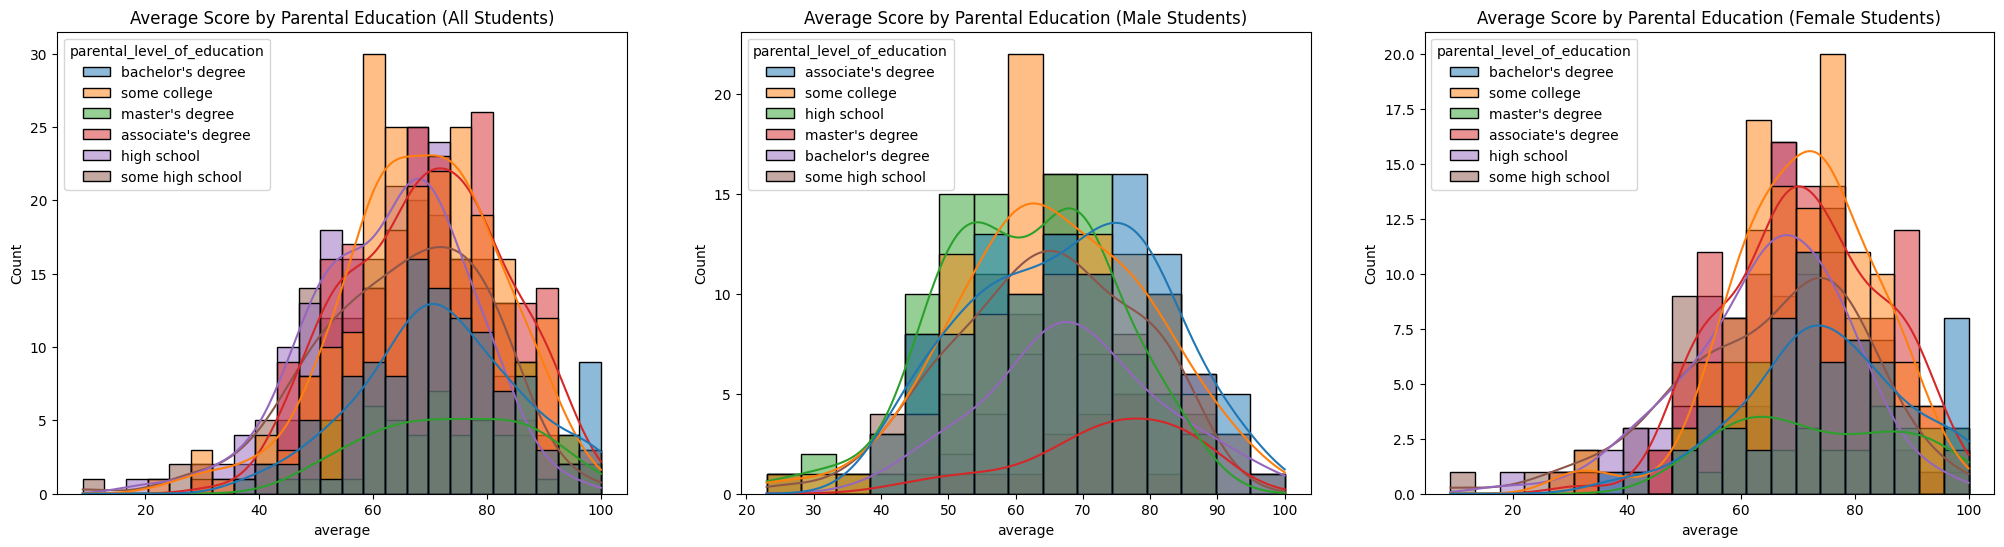

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Average score distribution by parental education for all students
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('Average Score by Parental Education (All Students)')

# Average score distribution by parental education for male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Average Score by Parental Education (Male Students)')

# Average score distribution by parental education for female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Average Score by Parental Education (Female Students)')

plt.show()

##### Insights:
- Overall, parental education doesn’t seem to have a strong impact on student performance.
- However, male students with parents holding an Associate’s or Master’s degree tend to perform better.
- For female students, parental education seems to have little to no effect on academic performance.

Finally, we’ll look at how race/ethnicity influences scores.

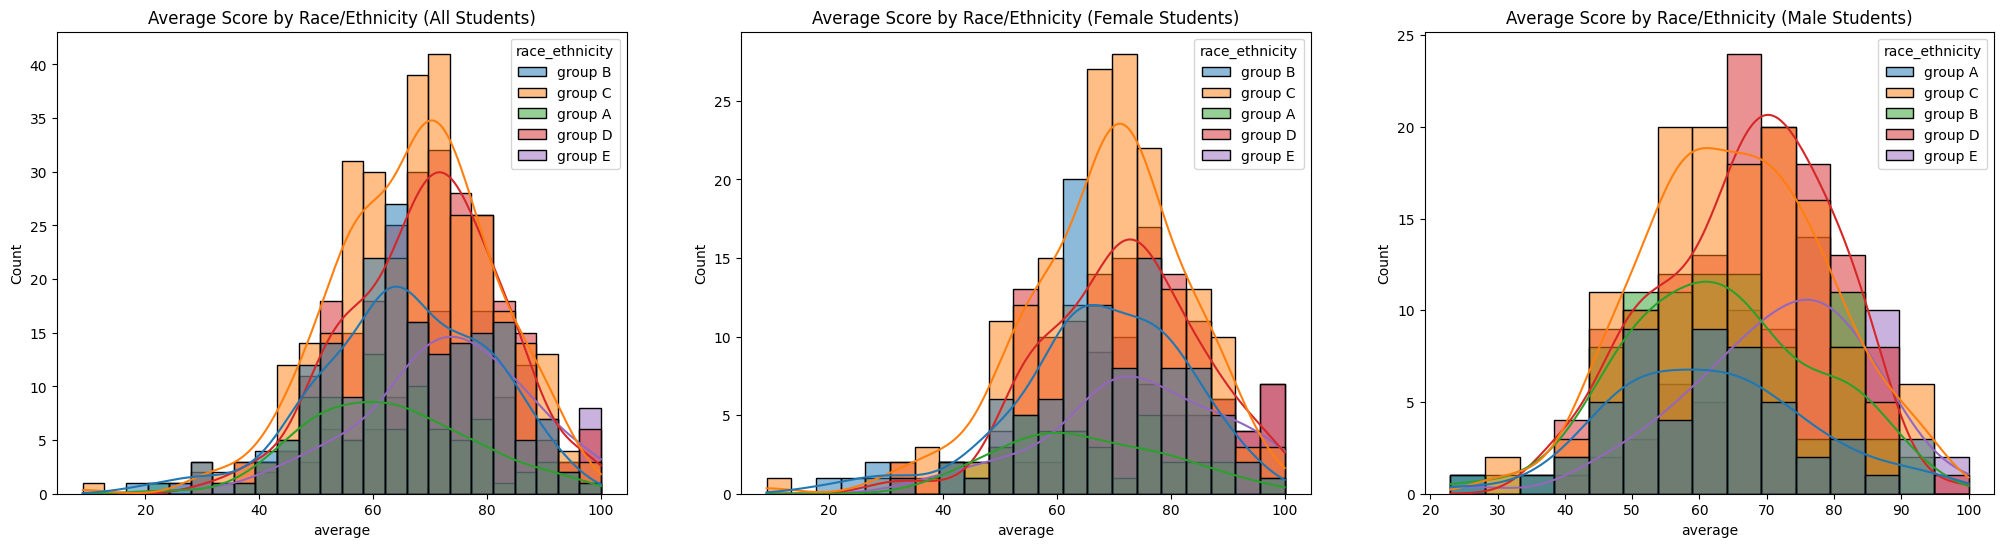

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Average score distribution by race/ethnicity for all students
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title('Average Score by Race/Ethnicity (All Students)')

# Average score distribution by race/ethnicity for female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Average Score by Race/Ethnicity (Female Students)')

# Average score distribution by race/ethnicity for male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title('Average Score by Race/Ethnicity (Male Students)')

plt.show()

##### Insights:
- Students belonging to groups A and B tend to perform poorly across the board.
- This trend holds true regardless of gender, indicating that race/ethnicity might be a factor that influences academic performance.

#### 4.2 Distribution of Scores in Each Subject

To further understand student performance, we'll visualize the distribution of scores in Math, Reading, and Writing. This will help us identify patterns and variations in student achievements across these subjects.

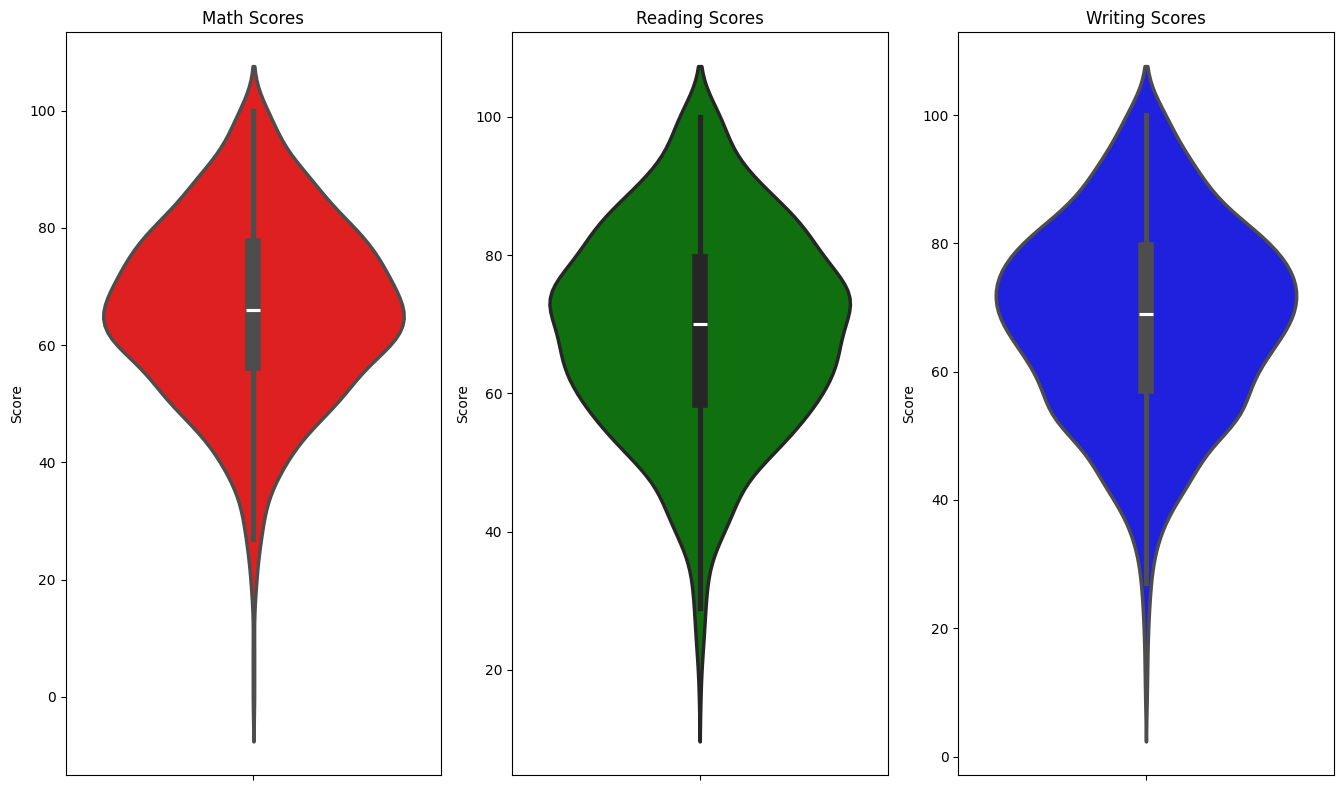

In [20]:
plt.figure(figsize=(18, 8))

# Violin plot for Math Scores
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=2.5)
plt.ylabel('Score')

# Violin plot for Reading Scores
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=2.5)
plt.ylabel('Score')

# Violin plot for Writing Scores
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=2.5)
plt.ylabel('Score')

plt.tight_layout()
plt.show()

##### Insights:

- **Math Scores:** The distribution of Math scores shows that most students score between 60 and 80. There is a relatively small proportion of students scoring below 60 or above 80.
- **Reading Scores:** Reading scores are more evenly distributed with most students scoring between 50 and 80. There is a noticeable concentration in the 60-80 range.
- **Writing Scores:** Similar to Reading, Writing scores are predominantly in the 50-80 range. The distribution also shows a concentration around the higher end of this range.

These visualizations provide a clear view of score distributions across subjects, highlighting areas where students tend to excel or face challenges. By understanding these patterns, targeted interventions and strategies can be developed to support student performance.

#### 4.3 Multivariate Analysis Using Pie Charts

To understand the distribution of various categorical features in the dataset, we will use pie charts. These visualizations will help us grasp the proportions of different categories within each feature.

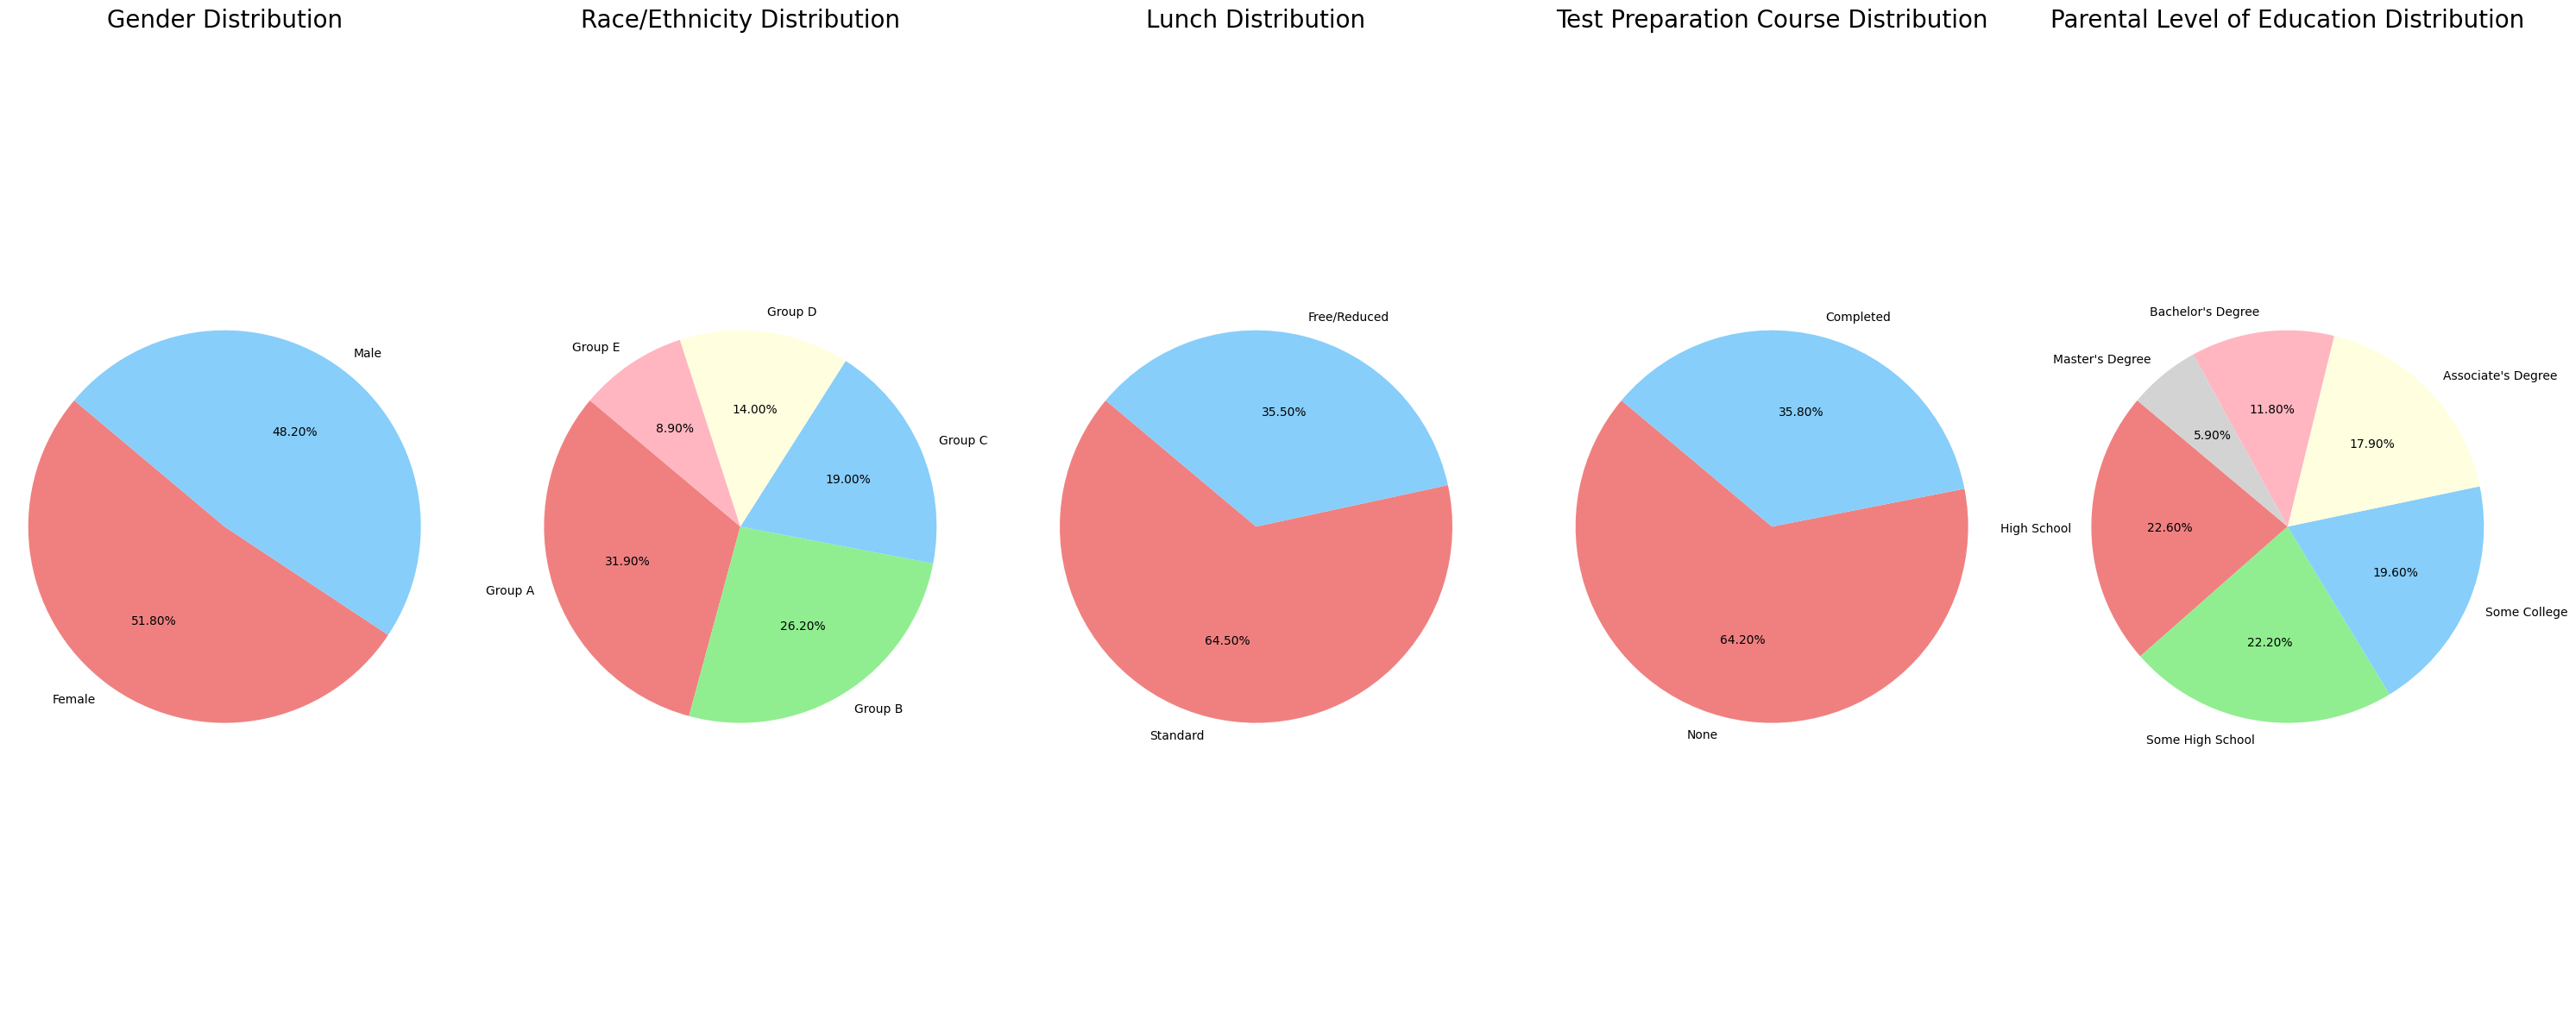

In [21]:
# Set figure size
plt.rcParams['figure.figsize'] = (30, 12)

# Gender Distribution
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['lightcoral', 'lightskyblue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')

# Race/Ethnicity Distribution
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
colors = ['lightcoral', 'lightgreen', 'lightskyblue', 'lightyellow', 'lightpink']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Race/Ethnicity Distribution', fontsize=20)
plt.axis('equal')

# Lunch Distribution
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['lightcoral', 'lightskyblue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Lunch Distribution', fontsize=20)
plt.axis('equal')

# Test Preparation Course Distribution
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['lightcoral', 'lightskyblue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Test Preparation Course Distribution', fontsize=20)
plt.axis('equal')

# Parental Level of Education Distribution
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['High School', 'Some High School', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree"]
colors = ['lightcoral', 'lightgreen', 'lightskyblue', 'lightyellow', 'lightpink', 'lightgrey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Parental Level of Education Distribution', fontsize=20)
plt.axis('equal')

plt.tight_layout()
plt.show()

##### Insights:

- **Gender Distribution:** The number of male and female students is almost equal, indicating a balanced gender representation.
- **Race/Ethnicity Distribution:** The largest group of students belongs to Group C, followed by other groups. This suggests variations in performance or participation across different ethnicities.
- **Lunch Distribution:** A higher proportion of students have a standard lunch compared to those with free/reduced lunch, which might influence their performance.
- **Test Preparation Course Distribution:** More students did not complete a test preparation course, highlighting potential areas for improvement in academic support.
- **Parental Level of Education Distribution:** The majority of students have parents with "Some College" education, closely followed by those with an "Associate's Degree". This distribution can provide insights into the socio-economic background of the students.

#### 4.4 Feature-Wise Visualization

This section examines the impact of the `gender` feature on students' performance through both univariate and bivariate analyses.

#### 4.4.1 Gender Column Analysis

##### Univariate Analysis: Distribution of Gender

To understand the distribution of gender within the dataset:

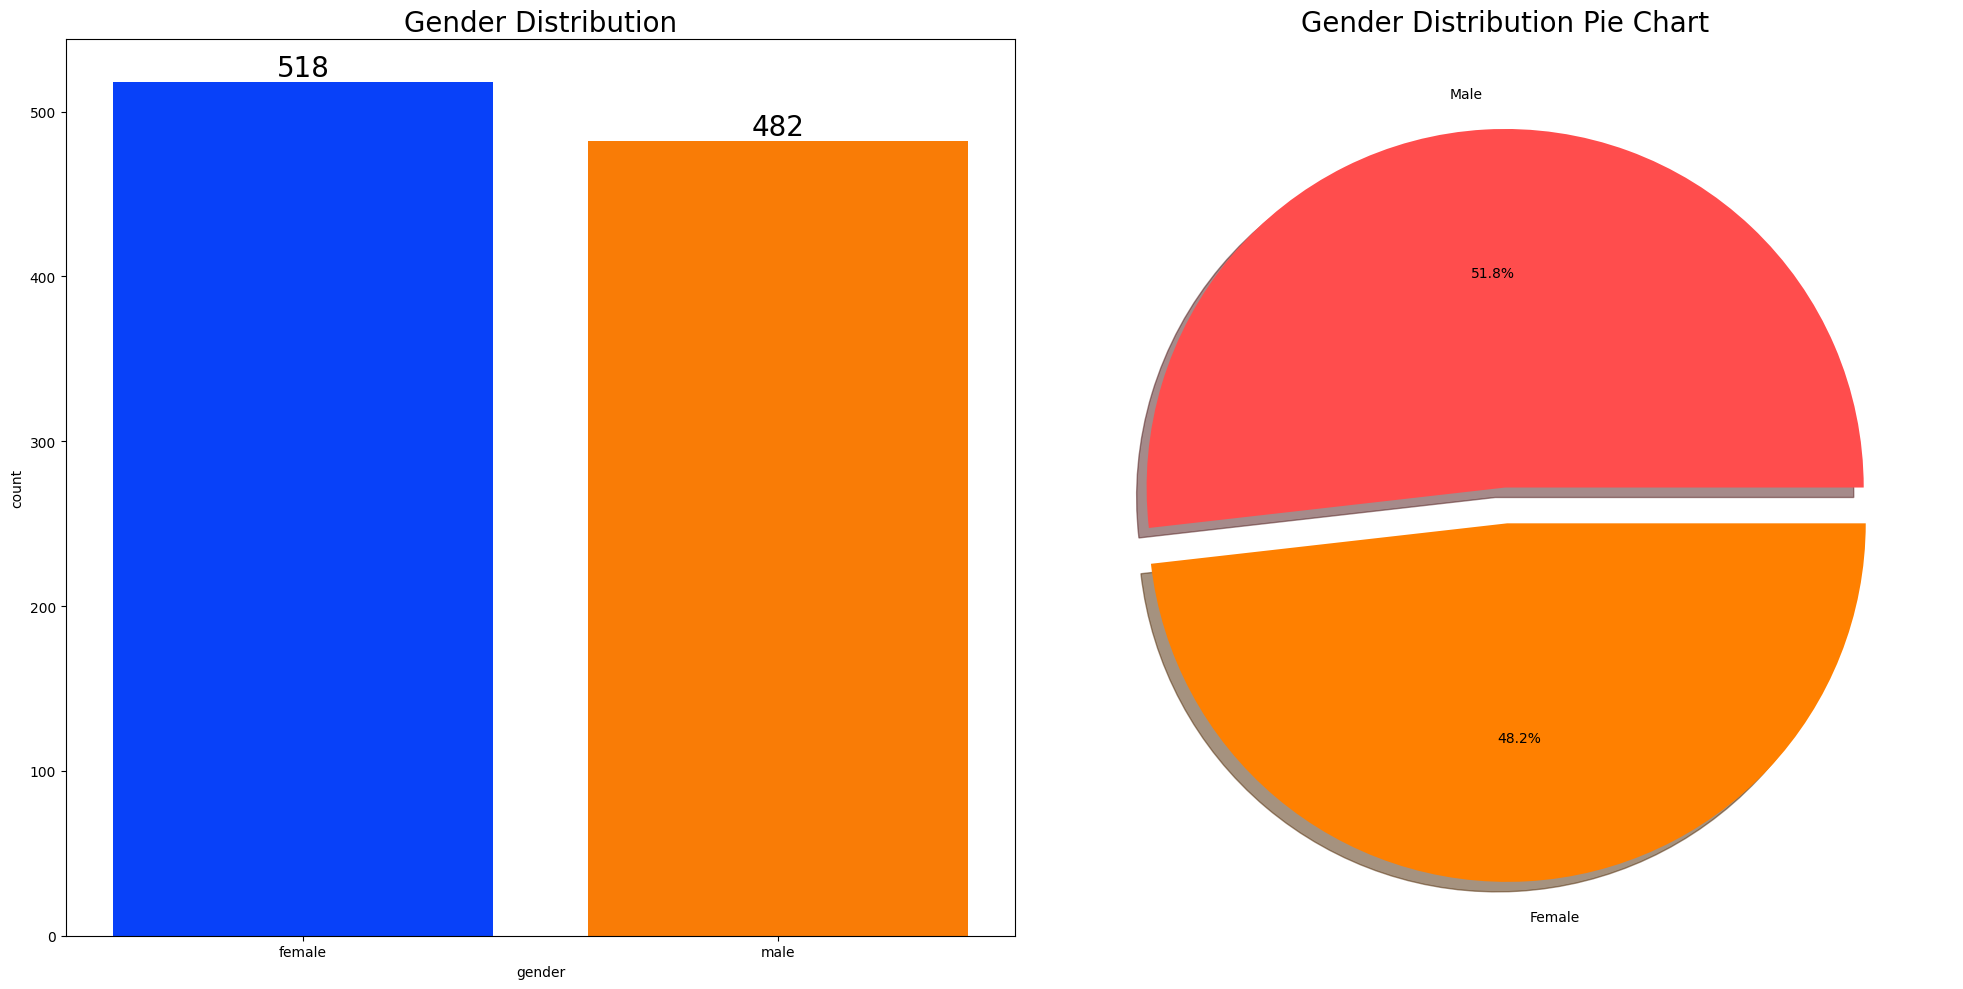

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for gender distribution
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Gender Distribution', fontsize=20)

# Pie chart for gender distribution
plt.subplot(1, 2, 2)
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution Pie Chart', fontsize=20)

plt.tight_layout()
plt.show()

##### Insights:
- The dataset shows a balanced distribution of gender: 518 female students (48%) and 482 male students (52%).

##### Bivariate Analysis: Impact of Gender on Student Performance

To analyze whether gender has any impact on students' performance, we will compare the average scores between genders:

In [23]:
# Filter numeric columns for analysis
numeric_df = df.select_dtypes(include=['number'])

# Group by gender and calculate the mean of numeric columns
gender_group = numeric_df.groupby(df['gender']).mean()

# Display the mean scores
print(gender_group)

        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


Now, visualize the comparison between genders:

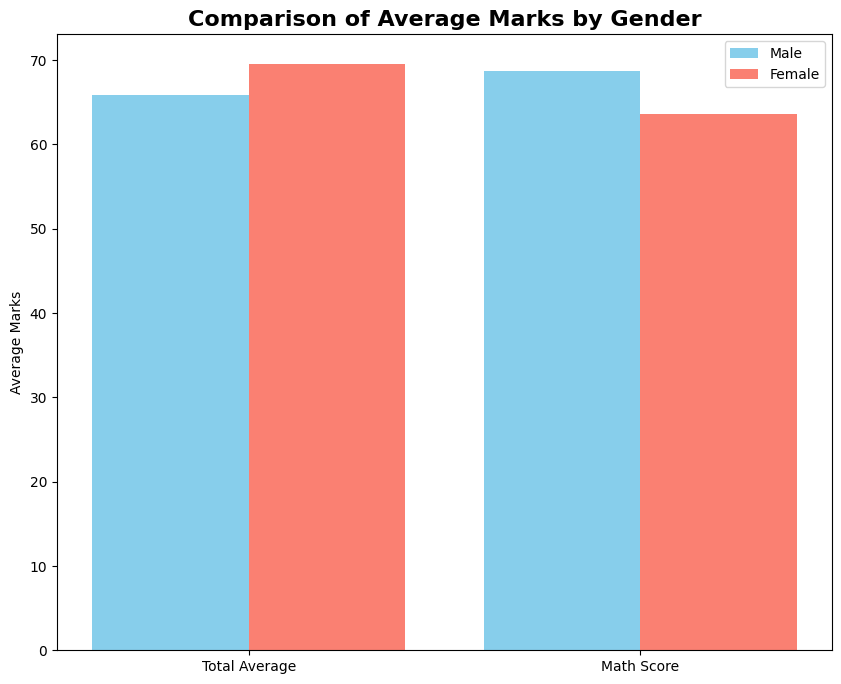

In [24]:
plt.figure(figsize=(10, 8))

# Data for visualization
X = ['Total Average', 'Math Score']
female_scores = [gender_group['average']['female'], gender_group['math_score']['female']]
male_scores = [gender_group['average']['male'], gender_group['math_score']['male']]

X_axis = np.arange(len(X))

# Bar plot for comparison
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='salmon')

plt.xticks(X_axis, X)
plt.ylabel('Average Marks')
plt.title('Comparison of Average Marks by Gender', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

##### Insights:
- On average, female students have a higher overall score compared to male students.
- Male students tend to score higher in Math compared to female students.

#### 4.4.2 Race/Ethnicity Column Analysis

This section examines the impact of the `race_ethnicity` feature on students' performance through univariate and bivariate analyses.

##### Univariate Analysis: Group-wise Distribution

To visualize the distribution of students across different racial/ethnic groups:

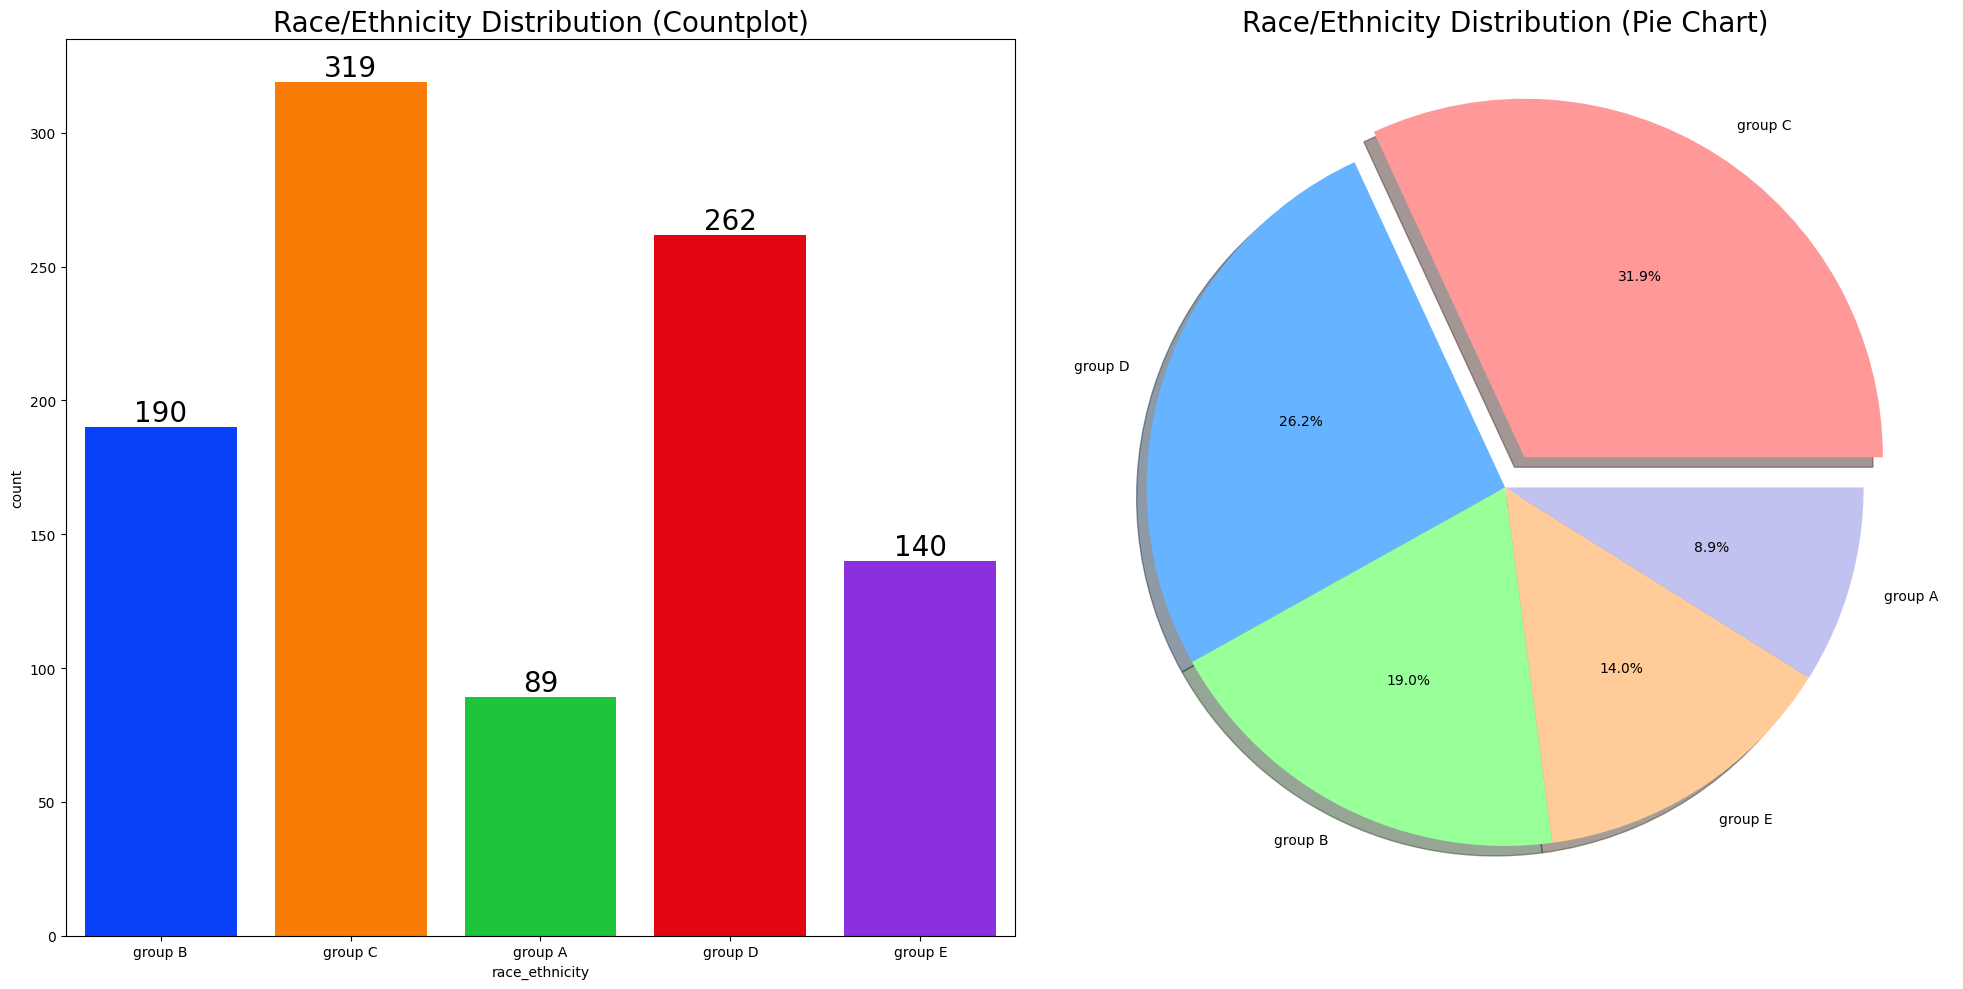

In [25]:
# Create subplots for countplot and pie chart
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for race/ethnicity distribution
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Race/Ethnicity Distribution (Countplot)', fontsize=20)

# Pie chart for race/ethnicity distribution
ax[1].pie(df['race_ethnicity'].value_counts(), 
          labels=df['race_ethnicity'].value_counts().index, 
          explode=[0.1, 0, 0, 0, 0], 
          autopct='%1.1f%%', 
          shadow=True, 
          colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
ax[1].set_title('Race/Ethnicity Distribution (Pie Chart)', fontsize=20)

plt.tight_layout()
plt.show()

##### Insights:
- The majority of students belong to Group C and Group D.
- The smallest group is Group A.

##### Bivariate Analysis: Impact of Race/Ethnicity on Student Performance

To analyze whether race/ethnicity influences students' performance, compare average scores by group:

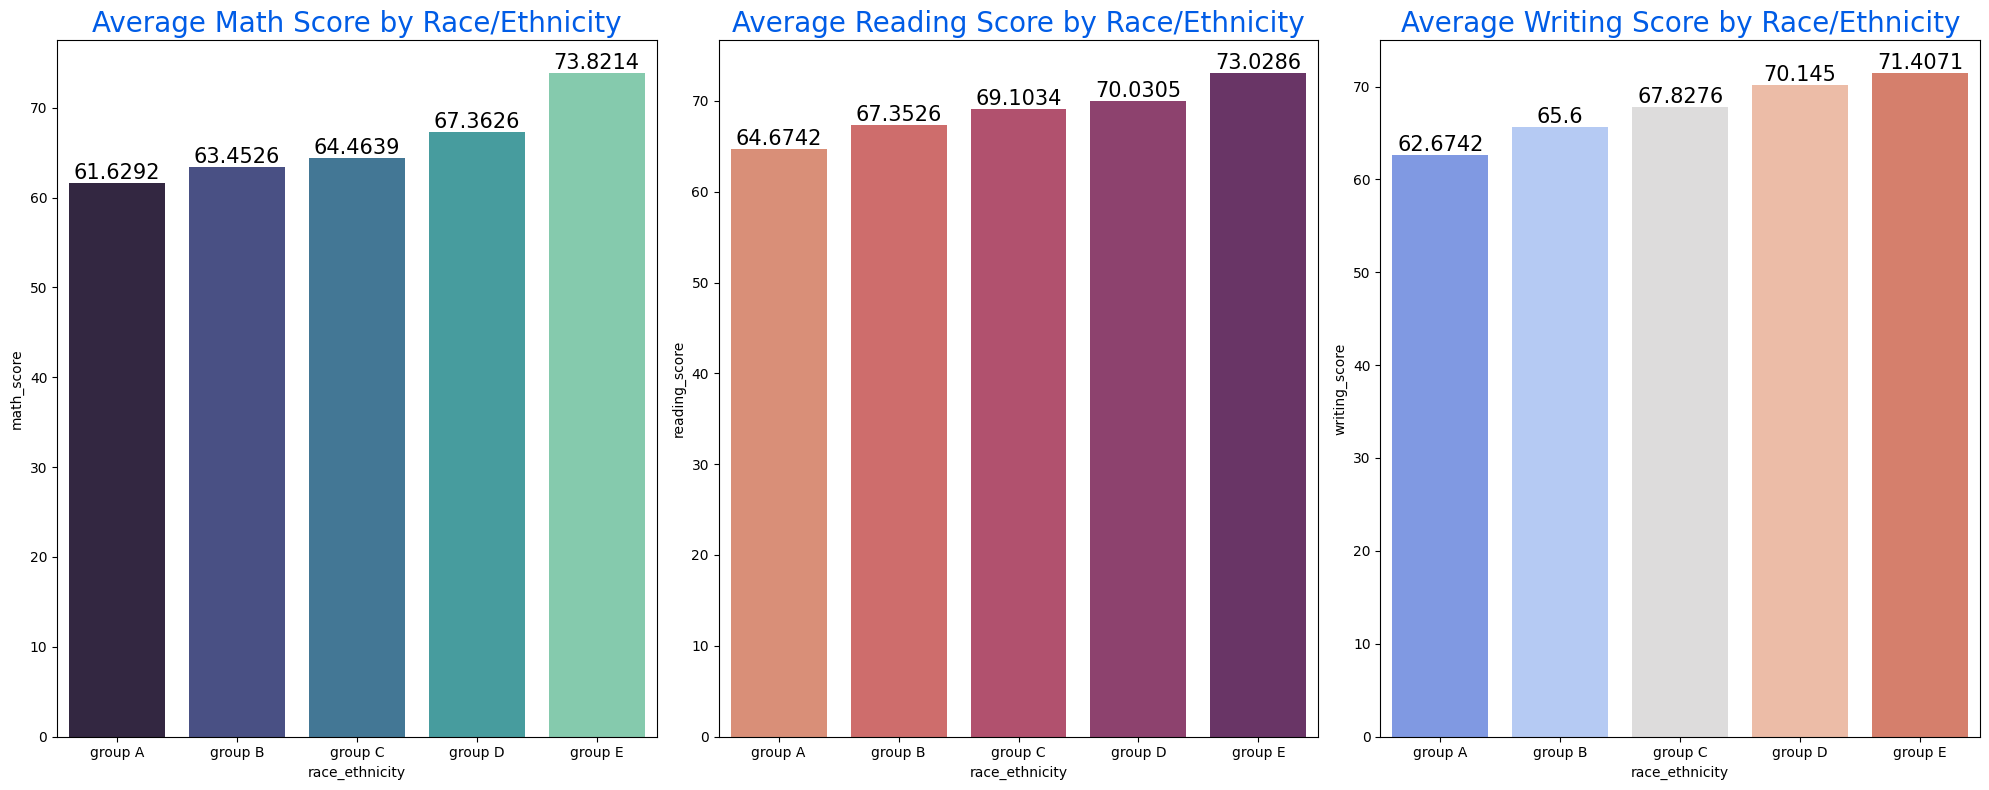

In [26]:
# Group by race/ethnicity and calculate mean scores for numeric columns only
Group_data = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

# Create subplots for score distributions
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math score
sns.barplot(x=Group_data.index, 
            y=Group_data['math_score'], 
            palette='mako', 
            ax=ax[0])
ax[0].set_title('Average Math Score by Race/Ethnicity', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading score
sns.barplot(x=Group_data.index, 
            y=Group_data['reading_score'], 
            palette='flare', 
            ax=ax[1])
ax[1].set_title('Average Reading Score by Race/Ethnicity', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing score
sns.barplot(x=Group_data.index, 
            y=Group_data['writing_score'], 
            palette='coolwarm', 
            ax=ax[2])
ax[2].set_title('Average Writing Score by Race/Ethnicity', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


##### Insights:
- Students from Group E have the highest average scores across all subjects.
- Students from Group A have the lowest average scores.
- The analysis suggests that students from lower socioeconomic backgrounds, as indicated by their group, tend to score lower across all subjects.

#### 4.4.3 Parental Level of Education Column Analysis

This section explores the educational background of students' parents and its impact on student performance.

##### Univariate Analysis: Educational Background of Parents

To visualize the distribution of parental education levels:

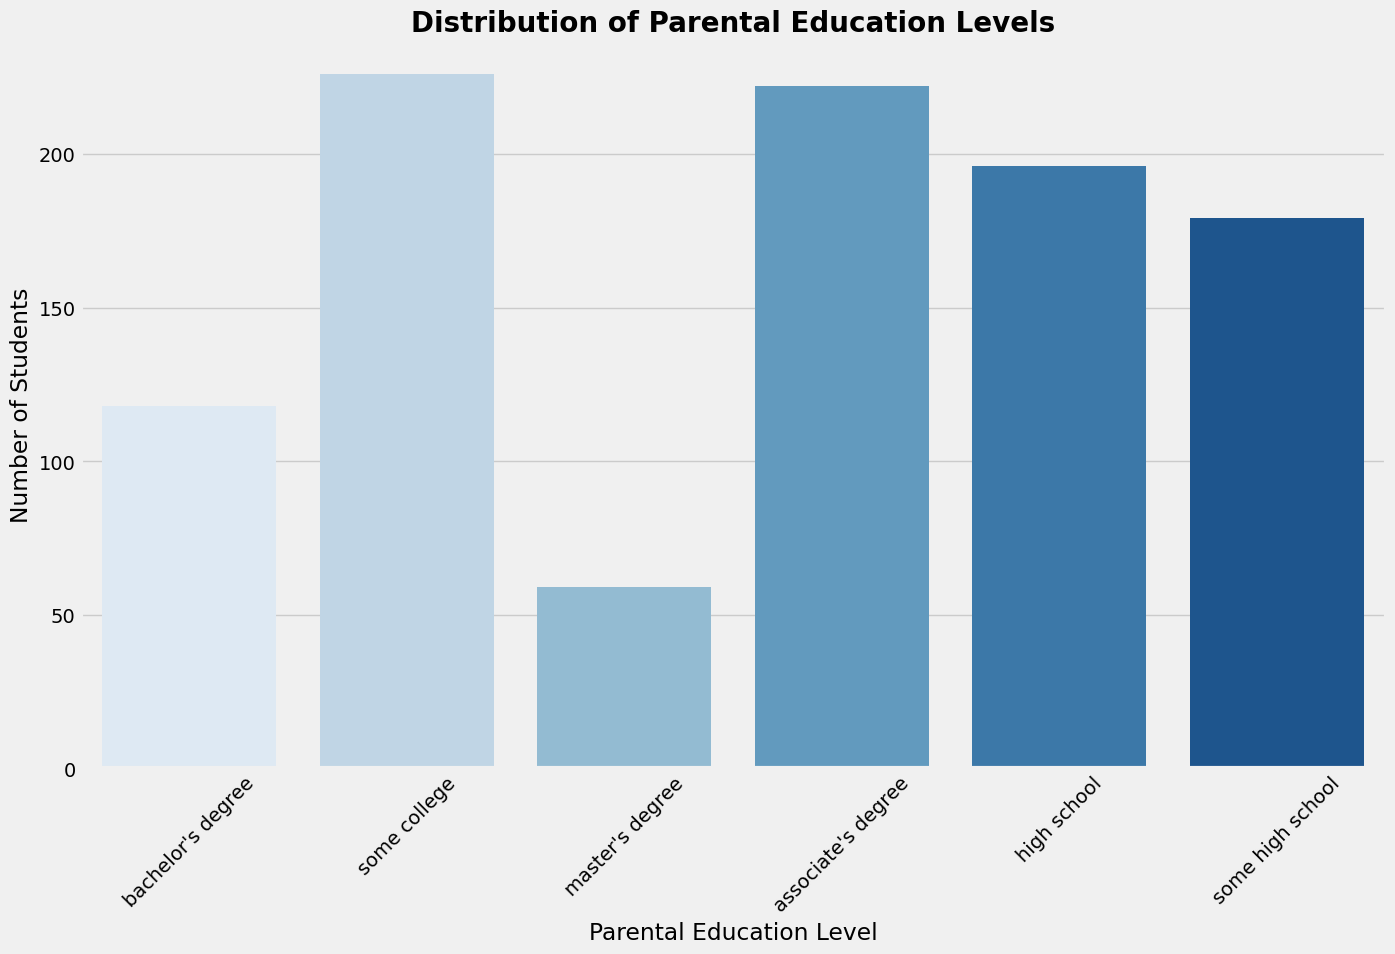

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Countplot for parental education levels
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Distribution of Parental Education Levels', fontweight='bold', fontsize=20)
plt.xlabel('Parental Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

##### Insights:
- The majority of parents have a degree from some college.
- The distribution of parental education levels is skewed towards less advanced degrees.

##### Bivariate Analysis: Impact of Parental Education on Student Performance

To analyze the impact of parental education on student performanc

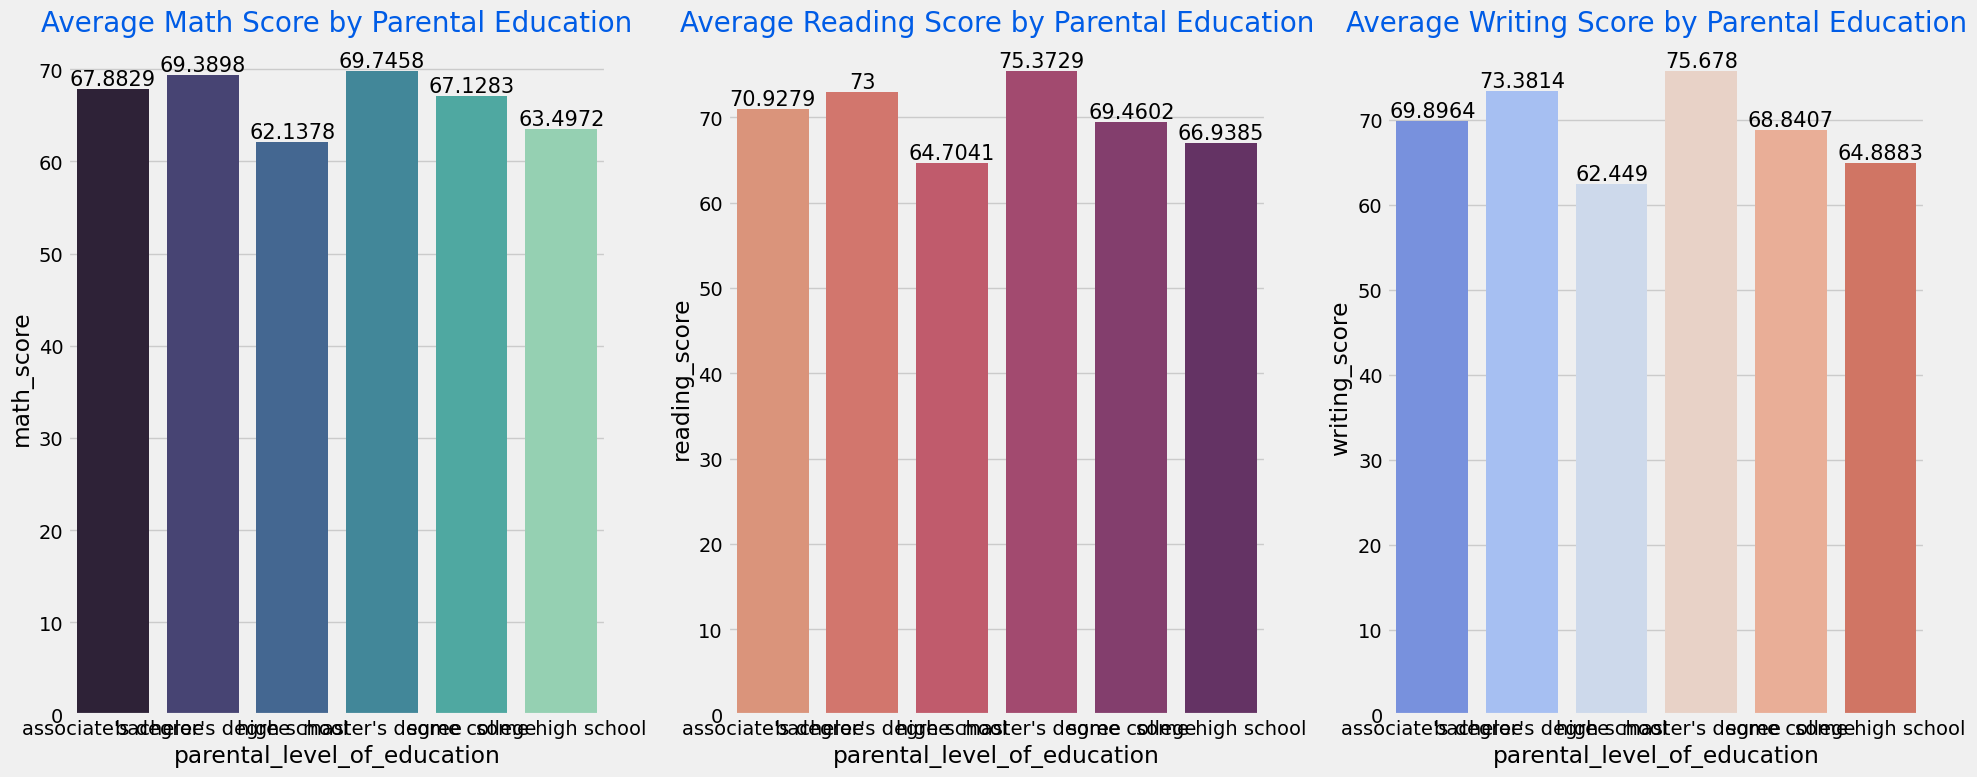

In [28]:
# Group by parental level of education and calculate mean scores for numeric columns only
education_data = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Create subplots for score distributions
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math score
sns.barplot(x=education_data.index, 
            y=education_data['math_score'], 
            palette='mako', 
            ax=ax[0])
ax[0].set_title('Average Math Score by Parental Education', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading score
sns.barplot(x=education_data.index, 
            y=education_data['reading_score'], 
            palette='flare', 
            ax=ax[1])
ax[1].set_title('Average Reading Score by Parental Education', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing score
sns.barplot(x=education_data.index, 
            y=education_data['writing_score'], 
            palette='coolwarm', 
            ax=ax[2])
ax[2].set_title('Average Writing Score by Parental Education', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


##### Insights:
- Students whose parents have a master's degree or bachelor's degree generally achieve higher scores across all subjects.
- There is a noticeable difference in performance, with higher education levels of parents correlating with better student scores.

#### 4.4.4 Lunch Column Analysis

This section examines the distribution of lunch types among students and evaluates the impact of lunch type on student performance.

##### Univariate Analysis: Distribution of Lunch Types

To visualize which type of lunch is more common among students:

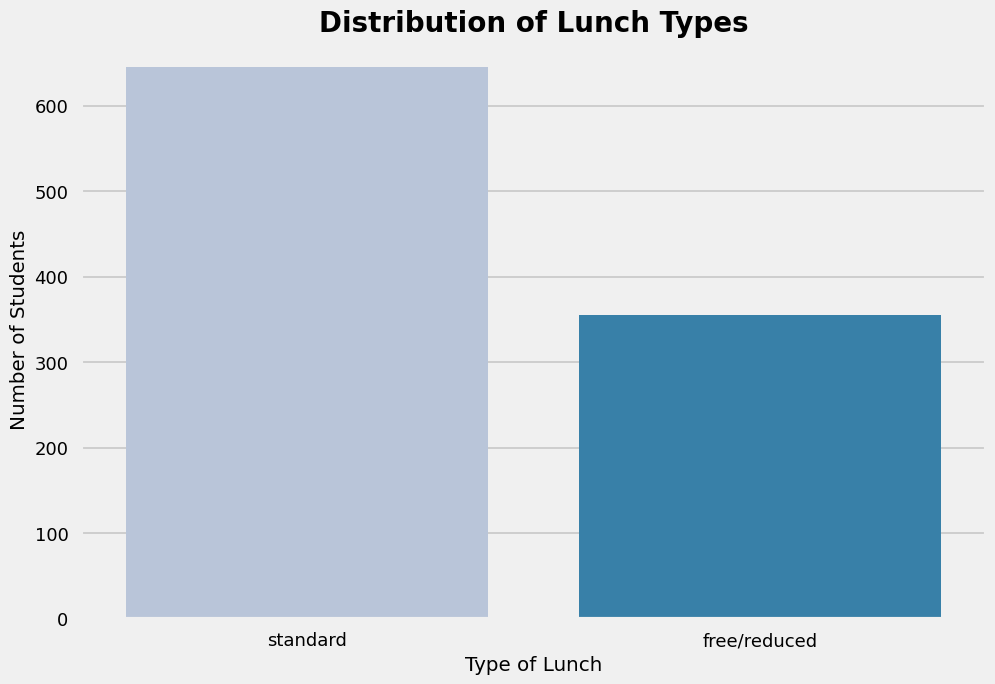

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Countplot for lunch types
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Distribution of Lunch Types', fontweight='bold', fontsize=20)
plt.xlabel('Type of Lunch')
plt.ylabel('Number of Students')
plt.show()

##### Insights:
- A larger number of students are served Standard lunch compared to those who receive a free/reduced lunch.

##### Bivariate Analysis: Impact of Lunch Type on Student Performance

To explore how lunch type affects student performance, compare average scores based on lunch type:

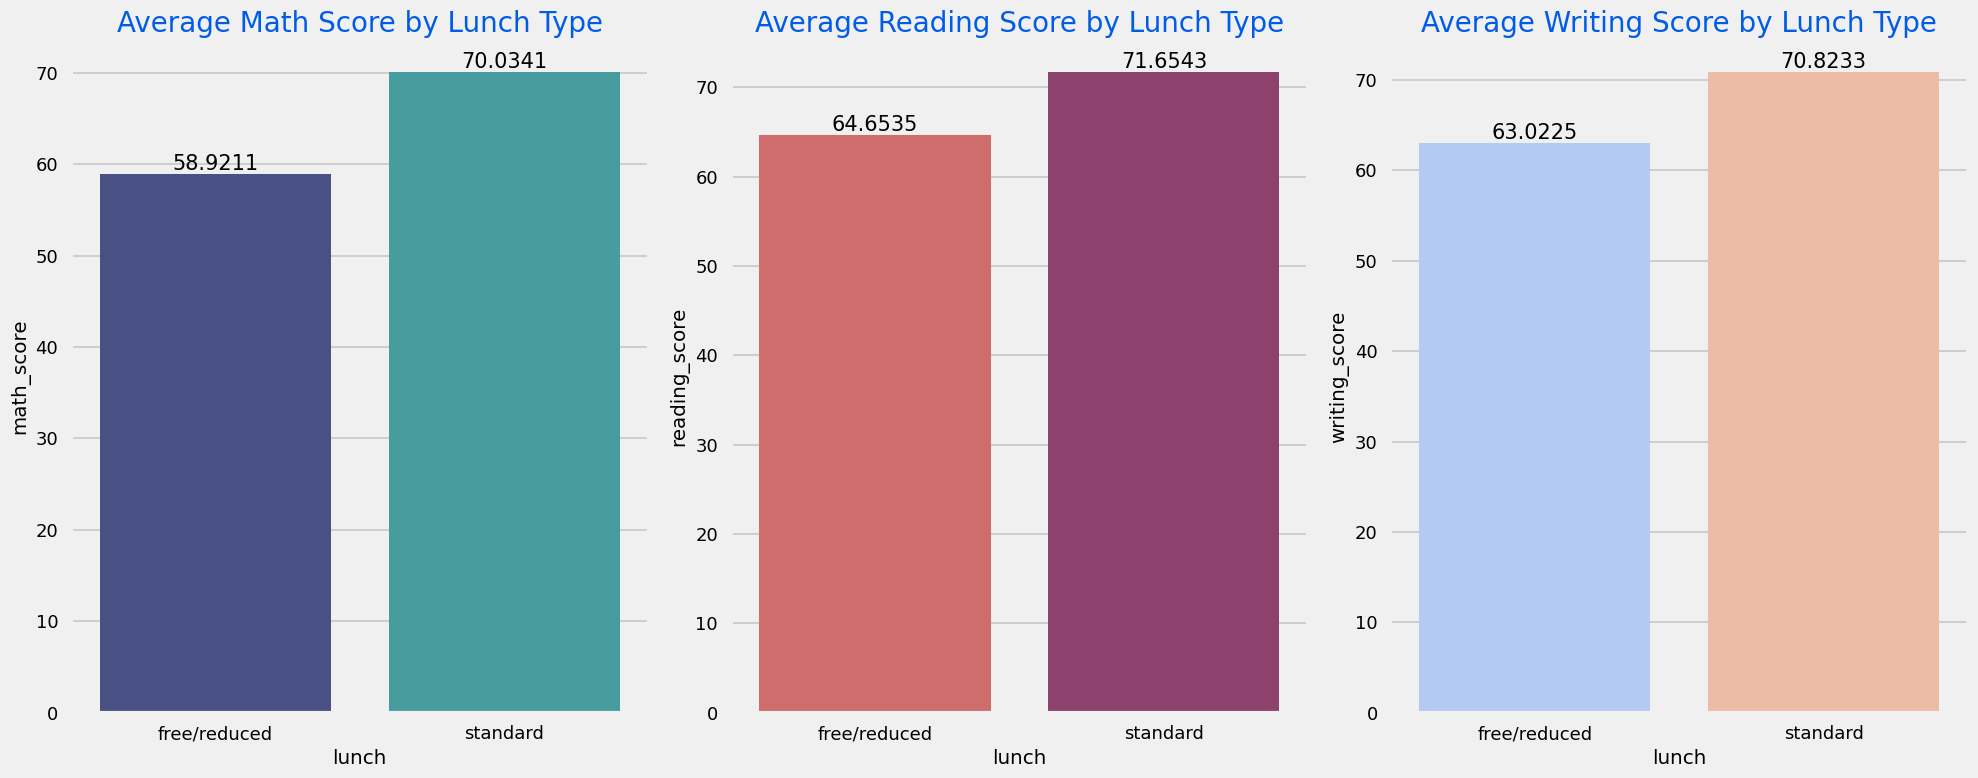

In [30]:
# Group by lunch type and calculate mean scores for numeric columns only
lunch_data = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()

# Create subplots for score distributions
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math score
sns.barplot(x=lunch_data.index, 
            y=lunch_data['math_score'], 
            palette='mako', 
            ax=ax[0])
ax[0].set_title('Average Math Score by Lunch Type', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading score
sns.barplot(x=lunch_data.index, 
            y=lunch_data['reading_score'], 
            palette='flare', 
            ax=ax[1])
ax[1].set_title('Average Reading Score by Lunch Type', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing score
sns.barplot(x=lunch_data.index, 
            y=lunch_data['writing_score'], 
            palette='coolwarm', 
            ax=ax[2])
ax[2].set_title('Average Writing Score by Lunch Type', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

##### Insights:
- Students who receive Standard lunch tend to have higher average scores across Math, Reading, and Writing compared to those who receive Free/Reduced lunch.

#### 4.4.5 Test Preparation Course Column Analysis

This section explores the impact of completing a test preparation course on student performance and examines how this variable interacts with other features like lunch type.

##### Bivariate Analysis: Impact of Test Preparation Course on Student Performance

To evaluate the effect of completing a test preparation course on scores in Math, Reading, and Writing, the following visualizations are used:

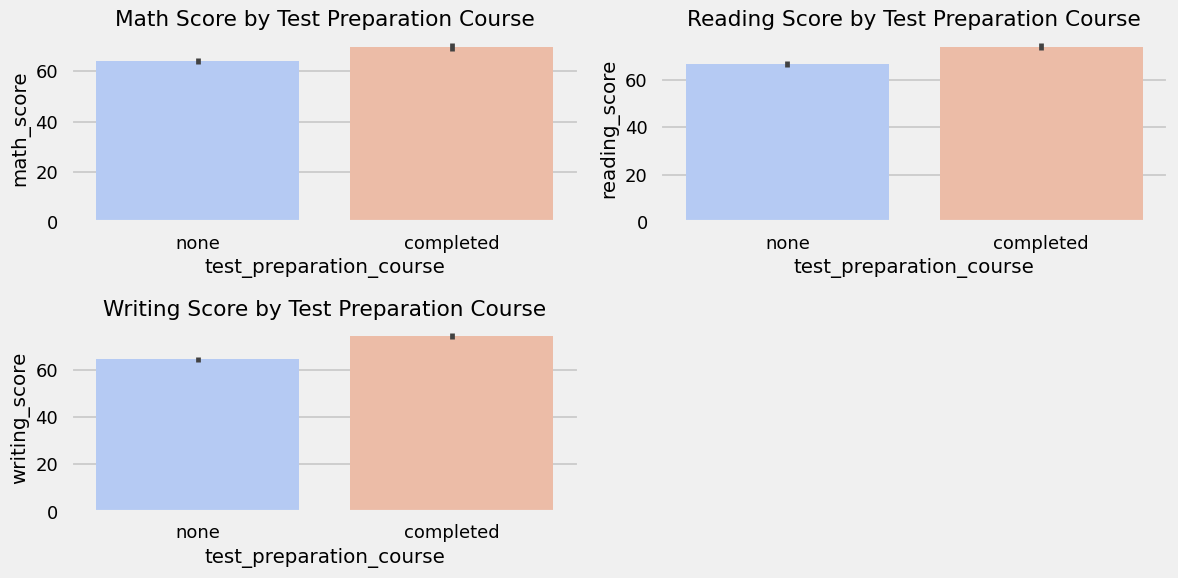

In [31]:
plt.figure(figsize=(12, 6))

# Plot Math scores by Test Preparation Course
plt.subplot(2, 2, 1)
sns.barplot(x='test_preparation_course', y='math_score', data=df, palette='coolwarm')
plt.title('Math Score by Test Preparation Course')

# Plot Reading scores by Test Preparation Course
plt.subplot(2, 2, 2)
sns.barplot(x='test_preparation_course', y='reading_score', data=df, palette='coolwarm')
plt.title('Reading Score by Test Preparation Course')

# Plot Writing scores by Test Preparation Course
plt.subplot(2, 2, 3)
sns.barplot(x='test_preparation_course', y='writing_score', data=df, palette='coolwarm')
plt.title('Writing Score by Test Preparation Course')

plt.tight_layout()
plt.show()

##### Insights:
- Students who have completed the Test Preparation Course generally score higher in Math, Reading, and Writing compared to those who did not take the course. This suggests that the preparation course has a positive impact on student performance.

#### 4.4.6 Checking for Outliers

In this section, we examine the presence of outliers in the dataset for each score category and the average score. Boxplots are used to visualize the distribution and identify any potential outliers.

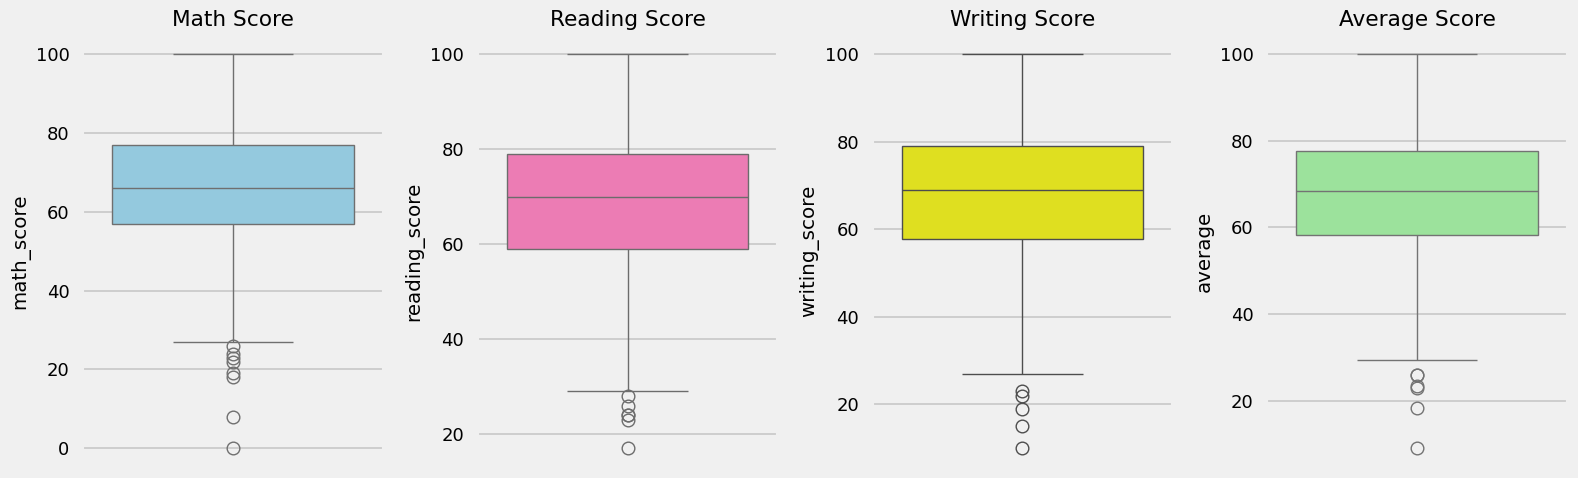

In [32]:
plt.subplots(1, 4, figsize=(16, 5))

# Boxplot for Math Scores
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.title('Math Score')

# Boxplot for Reading Scores
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.title('Reading Score')

# Boxplot for Writing Scores
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.title('Writing Score')

# Boxplot for Average Score
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()

#### Insights:
- **Math Score:** The boxplot indicates several outliers in the lower range, suggesting that some students score significantly lower than the majority.
- **Reading Score:** There are few outliers on the higher end, but the distribution seems fairly normal overall.
- **Writing Score:** Similar to the Math Score, there are outliers, particularly in the lower range.
- **Average Score:** The boxplot shows that the average score also has outliers, particularly on the lower end.

These visualizations help in understanding the spread of scores and the presence of extreme values that might need further investigation or treatment in the analysis.

#### 4.4.7 Multivariate Analysis Using Pairplot

A pairplot helps in visualizing relationships between multiple variables in the dataset, showing how each feature interacts with others.

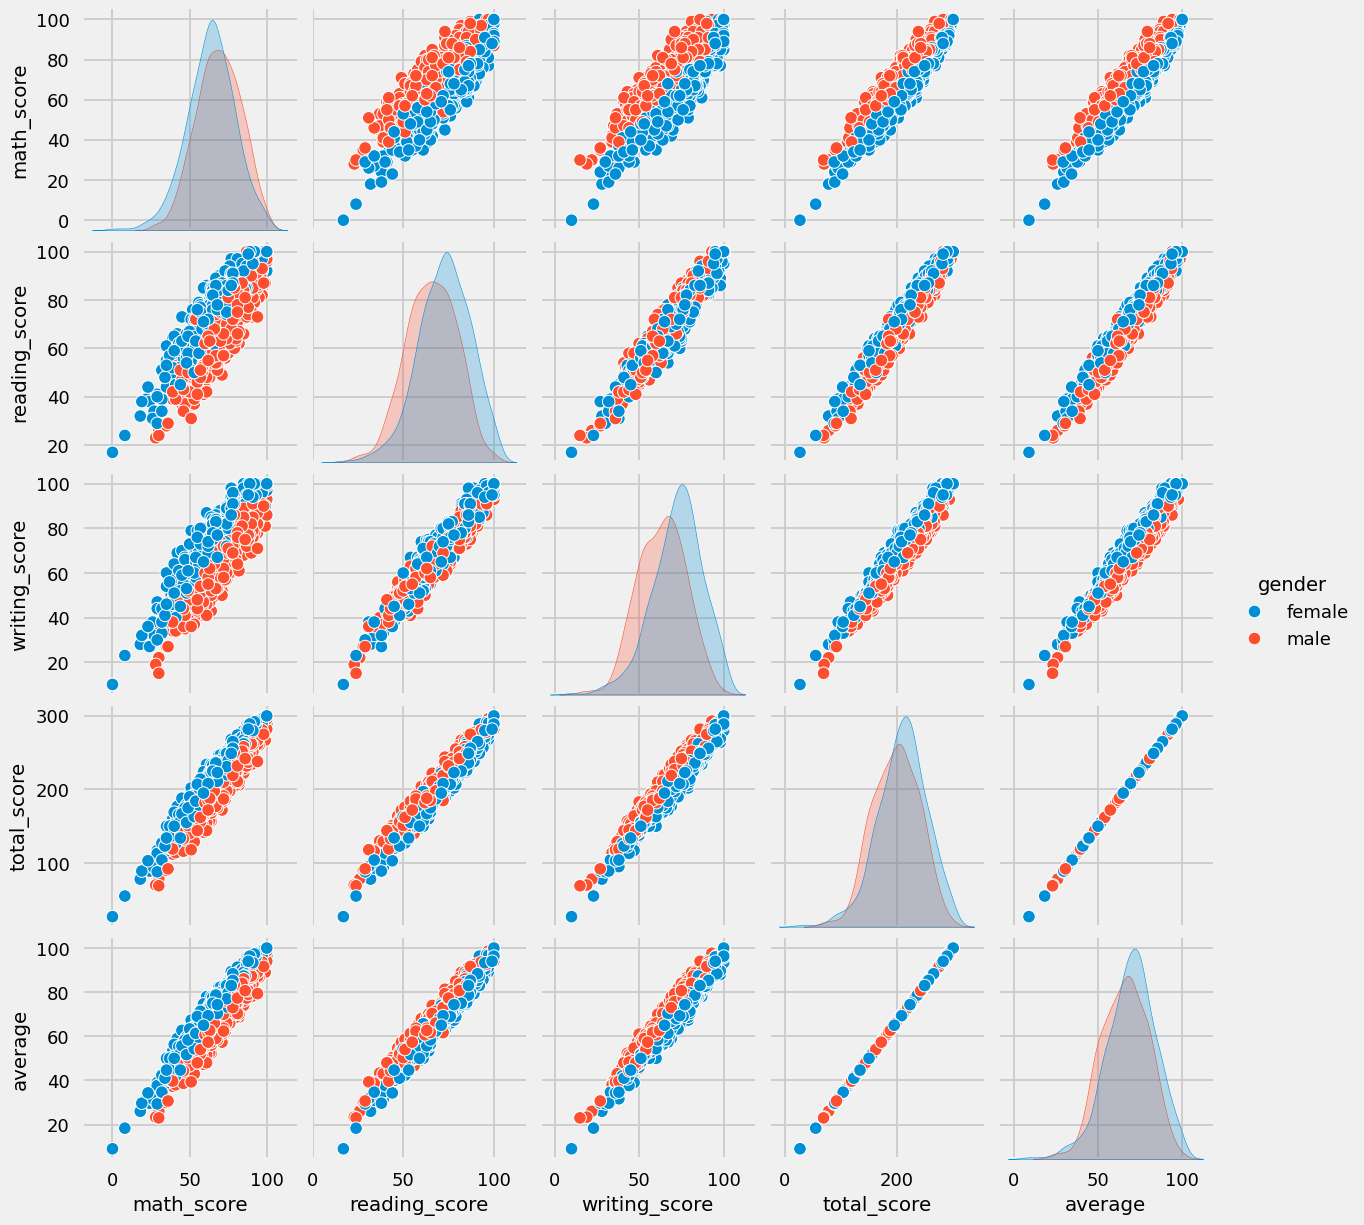

In [33]:
sns.pairplot(df, hue='gender')
plt.show()

#### Insights:
- **Linear Relationships:** The pairplot reveals that all scores (Math, Reading, and Writing) show a linear relationship with each other, suggesting that as performance in one subject improves, it generally improves in others as well.
- **Gender Differences:** The plot allows us to observe differences between genders. While the overall trend of increasing scores is similar, there may be variations in the distribution or spread of scores between male and female students.

This visualization helps in understanding the multivariate relationships in the data and can indicate how different variables are interrelated.

### 5. Conclusions

1. **Factors Affecting Performance:**
   - **Lunch Type:** Students with a standard lunch tend to perform better compared to those with a free/reduced lunch.
   - **Race/Ethnicity:** There are noticeable differences in performance across different racial/ethnic groups, with some groups performing better on average than others.
   - **Parental Level of Education:** The educational background of parents has some impact on student performance, though it varies. Students with parents who have a higher level of education (Master's or Bachelor's) tend to score better.

2. **Gender Performance:**
   - **Females:** Female students generally outperform males, leading in pass percentages and achieving higher scores across subjects.
   - **Males:** While females outperform males overall, males tend to score higher in Math.

3. **Test Preparation Course:**
   - **Impact:** The test preparation course does not show a strong correlation with improved performance on its own, but completing the course is beneficial as it contributes to higher scores in all subjects.

4. **Overall Insights:**
   - Performance is influenced by a combination of factors including lunch type, race/ethnicity, and parental education.
   - Gender differences are significant, with females generally performing better.
   - Completing a test preparation course shows benefits, though its impact may be subtle compared to other factors.